<a href="https://colab.research.google.com/github/MuhammadAhtishamYousaf/Deep-Learning-Practices/blob/main/transfer_learning_feature_extraction(data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#All Previous Steps

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.03G/1.06G [00:07<00:00, 101MB/s]
100% 1.06G/1.06G [00:07<00:00, 148MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten, Dropout
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable = False

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#Data Augmentation

In [ ]:
batch_size = 64

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


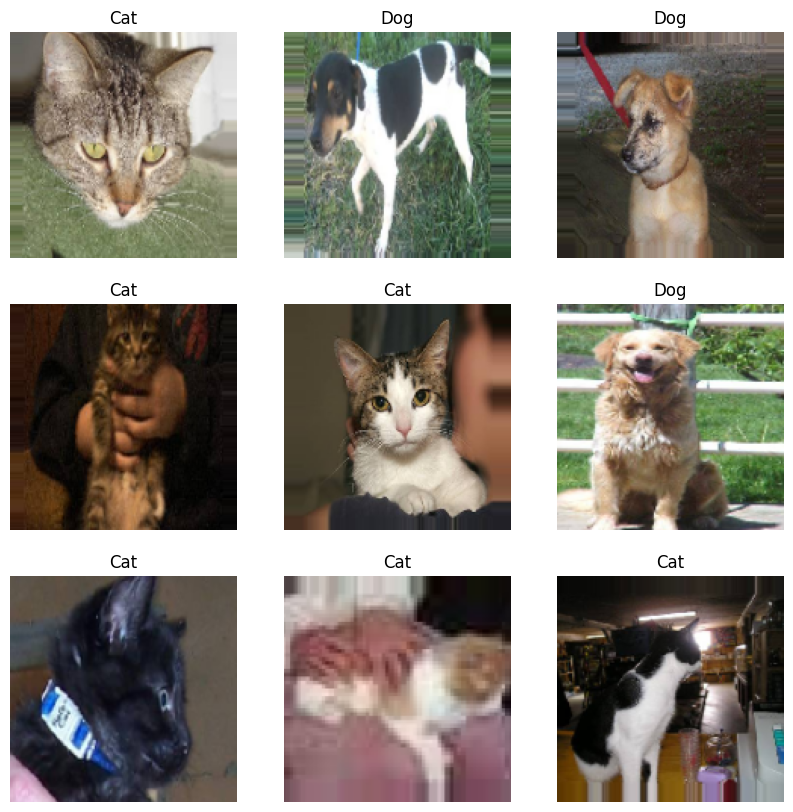

In [ ]:
# Generate a batch of images and labels
images, labels = next(train_generator)

# Display the first few images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Dog" if labels[i] == 1 else "Cat")
    plt.axis("off")

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 182s 536ms/step - accuracy: 0.8050 - loss: 0.4733 - val_accuracy: 0.8970 - val_loss: 0.2363
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 152s 484ms/step - accuracy: 0.8923 - loss: 0.2501 - val_accuracy: 0.9008 - val_loss: 0.2277
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 487ms/step - accuracy: 0.8992 - loss: 0.2350 - val_accuracy: 0.9130 - val_loss: 0.2041
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 488ms/step - accuracy: 0.9032 - loss: 0.2270 - val_accuracy: 0.9120 - val_loss: 0.1989
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 482ms/step - accuracy: 0.9081 - loss: 0.2122 - val_accuracy: 0.9196 - val_loss: 0.1946
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 482ms/step - accuracy: 0.9152 - loss: 0.2036 - val_accuracy: 0.9210 - val_loss: 0.1890
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 487ms/step - accuracy: 0.9194 - loss: 0.1959 - val_accuracy: 0.9206 - val_loss: 0.1936
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 488ms/step - accuracy: 0.9189 -

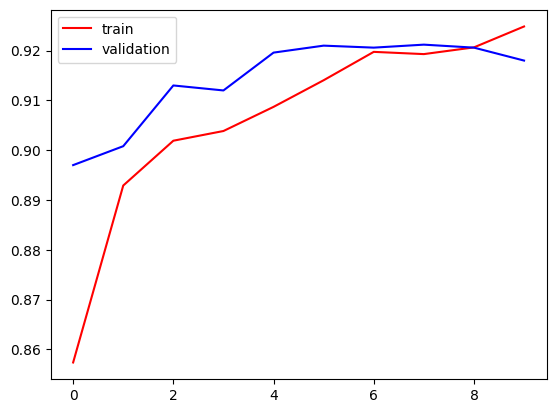

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

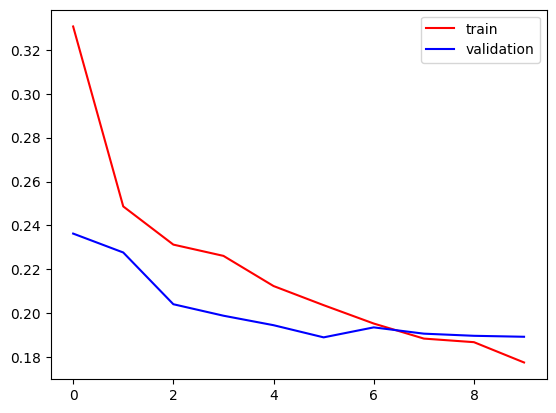

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()